Kỹ thuật học máy có giám sát là việc huấn luyện mô hình dựa trên một tập hợp các tính năng (features) và dự đoán nhãn (label) bằng cách sử dụng tập dữ liệu có chứa các giá trị nhãn đã biết. Bạn có thể nghĩ về hàm này như thế này: 
y = f([x1,x2,x3])

Trong đó y đại diện cho nhãn mà chúng ta muốn dự đoán và X đại diện cho vectơ của các đặc trưng mà mô hình sử dụng để dự đoán nó.

Phân loại (classification) là một mô hình học máy có giám sát, trong đó bạn đào tạo một mô hình sử dụng các tính năng (các giá trị x) để dự đoán một nhãn (y) bằng cách tính toán xác suất có thể có của từng nhãn và dự đoán một nhãn thích hợp dựa trên giá trị xác suất. Hình thức phân loại đơn giản nhất là phân loại nhị phân (binary), trong đó nhãn là 0 hoặc 1, "Đúng" hoặc "Sai"; "Có lợi nhuận" hoặc "Không có lợi nhuận"...

Trong bài viết này, tôi sẽ sử dụng kĩ thuật phân loại đa lớp (multiclass classfication) để phân biệt 3 loại hoa diên vĩ khác nhau dựa trên 4 đặc trưng: chiều dài cánh hoa (petal length), chiều rộng cánh hoa (petal width), chiều dài đài hoa (sepal length) và chiều rộng đài hoa (sepal width).

Sử dụng thư viện pandas và numpy 

In [29]:
import pandas as pd
import numpy as np

Tải bảng dữ liệu và in ra 5 dòng đầu tiên của bảng


In [30]:
df_iris = pd.read_csv("iris.csv", delimiter=",",header="infer")
df_iris.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


*Cột* variety có chứa 3 giá trị là : Setosa, Versicolor và Virginica là tên của 3 loại khác nhau của diên vĩ. Chúng ta cần map chúng thành các giá trị số để có thể thực hiện các phép toán sau này.

In [31]:
#Khởi tạo một list iris_classes chứa tên của 3 loại hoa 
iris_classes = ['Setosa','Versicolor','Virginica']

In [32]:
# Mã hoá tên của 3 loại hoa với các giá trị 0 (Setosa), 1 (Versicolor) và 2 (Virginica)
df_iris = df_iris.replace(iris_classes,[0, 1, 2])

Kiểm tra xem bảng dữ liệu có giá trị null hay không. Nếu có chúng ta cần phải có những bước xử lý phù hợp vì dữ liệu null sẽ gây ra nhiều vấn đề cho mô hình học máy. Với bảng dữ liệu df_iris của chúng ta đang làm thì không có giá trị rỗng nào.

In [33]:
df_iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Sử dụng hàm describe() trong pandas để lấy được bảng thống kê cho tất cả các cột dạng số trong bảng dữ liệu.

In [34]:
df_iris.describe()

,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Tạo 2 bảng mới. Bảng df_X chứa 4 cột (sepal.length, sepal.width, petal.length, petal.width) là bảng chứa các đặc trưng cho mô hình của chúng ta. Bảng df_y có 1 cột (variety) là bảng chứa giá trị nhãn mà chúng ta muốn dự đoán (0 cho setosa, 1 cho versicolor và 2 cho virginica).

In [35]:
df_X = df_iris.filter(['sepal.length','sepal.width','petal.length','petal.width'],axis = 1)
df_y = df_iris.filter(['variety'])
print('Top 5 rows of df_X table: \n{}'.format(df_X.head()))
print('Top 5 rows of df_y table: \n{}'.format(df_y.head()))

Top 5 rows of df_X table: 
   sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
Top 5 rows of df_y table: 
   variety
0        0
1        0
2        0
3        0
4        0


Bây giờ chúng ta sẽ convert 2 bảng df_X và df_y thành các vector X và y cho việc tính toán bằng hàm to_numpy().

In [36]:
X = df_X.to_numpy()
y = df_y.to_numpy()
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [37]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (150, 4)
Shape of y: (150, 1)


Shape của X là (150,4) có nghĩa là ma trận X có 150 chiều (dimension) và mỗi chiều có 4 phần tử (elements)

Chúng ta có thể in ra khoảng giá trị min-max của các đặc trưng. Mục đích của việc này không chỉ là để có thêm thông tin, mà mục đích của chúng ta khi làm bước này là để xem giá trị của các đặc trưng có chung độ lớn hay không. Nếu giá trị của các đặc trưng không đều nhau, ví dụ đặc trưng 1 có giá trị từ 1-10, đặc trưng 2 có giá trị từ 1 triệu đến 10 triệu thì mô hình học máy của chúng ta sẽ bị bias do sự khác biệt này. Nếu xảy ra điều này thì chúng ta cần làm một bước gọi là normalization cho các đặc trưng.

In [38]:
print('Sepal Length min: {}, max: {}'.format(np.min(X[:,0]), np.max(X[:,0]))) 
print('Sepal Width min: {}, max: {}'.format(np.min(X[:,1]), np.max(X[:,1]))) 
print('Petal Length min: {}, max: {}'.format(np.min(X[:,2]), np.max(X[:,2]))) 
print('Petal Width min: {}, max: {}'.format(np.min(X[:,3]), np.max(X[:,3]))) 

Sepal Length min: 4.3, max: 7.9
Sepal Width min: 2.0, max: 4.4
Petal Length min: 1.0, max: 6.9
Petal Width min: 0.1, max: 2.5


Chúng ta thấy giá trị của 4 đặc trưng trong bài toán không quá chênh lệch. Do vậy chúng ta không cần phải normalize data trong trường hợp này.

Chia dữ liệu thành thành 2 bộ dữ liệu khác nhau: train set và test set. Bộ dữ liệu test có độ lớn bằng 20% bộ dữ liệu gốc. Sau đó in shape của từng bộ dữ liệu để kiểm tra.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1612)
print('Shape of X train', X_train.shape)
print('Shape of y train', y_train.shape)
print('Shape of X test', X_test.shape)
print('Shape of y test', y_test.shape)

Shape of X train (120, 4)
Shape of y train (120, 1)
Shape of X test (30, 4)
Shape of y test (30, 1)


Như vậy chúng ta đã chia bộ dữ liệu thành 4 tập con khác nhau: X_train, y_train, X_test, y_test.

In [41]:
print(f'y train: {y_train}')

y train: [[0]
 [1]
 [0]
 [2]
 [2]
 [1]
 [0]
 [1]
 [0]
 [1]
 [2]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [2]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [0]
 [1]
 [0]
 [2]
 [2]
 [0]
 [2]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [2]
 [1]
 [0]
 [2]
 [1]
 [1]
 [1]
 [0]
 [2]
 [0]
 [0]
 [2]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [2]
 [0]
 [1]
 [0]
 [2]
 [0]
 [1]
 [1]
 [1]
 [1]
 [2]
 [0]
 [1]
 [1]
 [2]
 [0]
 [0]
 [2]
 [0]
 [1]
 [0]
 [0]
 [2]
 [2]
 [0]
 [0]
 [0]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [2]
 [0]
 [0]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [0]
 [2]
 [0]
 [2]
 [1]
 [2]
 [2]
 [0]]


Tiếp theo, chúng ta cần chuyển shape của y_train và y_test thành một mảng đơn với lệnh reshape(-1)

In [43]:
y_test = y_test.reshape(-1)
y_train = y_train.reshape(-1)
print('Shape of y train', y_train.shape)
print('Shape of y test', y_test.shape)

Shape of y train (120,)
Shape of y test (30,)


In [44]:
print(f'y_train: {y_train}')

y_train: [0 1 0 2 2 1 0 1 0 1 2 1 0 1 1 1 1 0 1 1 0 2 1 2 1 1 2 2 2 1 2 0 1 0 2 2 0
 2 1 1 1 0 0 0 2 1 0 2 1 1 1 0 2 0 0 2 0 0 1 1 1 0 1 2 0 1 0 2 0 1 1 1 1 2
 0 1 1 2 0 0 2 0 1 0 0 2 2 0 0 0 2 1 2 1 1 1 1 2 0 0 0 2 2 2 2 2 2 2 2 1 2
 1 0 2 0 2 1 2 2 0]


Sử dụng mô hình LogisticRegression trong thư viện sklearn cho bài toán của chúng ta và huấn luyện mô hình bằng hàm fit(X_train, y_train). Đặt tên cho mô hình được huấn luyện là multi_model

In [45]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(X_train, y_train)
print (multi_model)


LogisticRegression(C=10.0, max_iter=10000)


Sử dụng mô hình multi_model đã được huấn luyện để dự đoán nhãn cho 15 dữ liệu đầu tiên trong bộ test. Kết quả không tệ, chỉ 1 dữ liệu có nhãn dự đoán là không trùng khớp với nhãn test.

In [46]:
predictions = multi_model.predict(X_test)
print('Predicted labels: ', predictions[:15])
print('Actual labels   : ' ,y_test[:15])

Predicted labels:  [2 2 0 0 0 1 1 0 1 2 0 2 0 1 2]
Actual labels   :  [2 2 0 0 0 1 2 0 1 2 0 2 0 1 2]


Sử dụng thư viện classification_report để kiểm tra xem mô hình đã huấn luyện của chúng ta tốt đến mức nào. Với mô hình này thì độ chính xác trung bình là 97% có thể xem là mô hình khá tốt.

In [47]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      1.00      0.93         7
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Chúng ta có thể xem giá trị trung bình của Accuracy, Precision và Recall như bên dưới.

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.9666666666666667
Overall Precision: 0.9583333333333334
Overall Recall: 0.9696969696969697


Sử dụng confusion_matrix cũng là một cách khá hay để trực quan hoá kết quả dự đoán cho bộ test từ mô hình. Kết quả bên dưới cho thấy mô hình của chúng ta dự đoán chính xác 12/12 cho loại hoa Setosa, trong 8 giá trị cho loại hoa Versicolor thì mô hình dự đoán đúng nhãn 7 giá trị, giá trị còn lại bị đoán nhầm thành Virginica. Đối với 10 giá trị của hoa Virginaca trong bộ test thì mô hình dự đoán đúng cả 10.

In [49]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_test, predictions)
print(mcm)

[[12  0  0]
 [ 0  7  0]
 [ 0  1 10]]


Với những bài toán phức tạp hơn thì chúng ta có thể dùng thư viện pylot để trực quan hoá tốt hơn như ví dụ bên dưới.

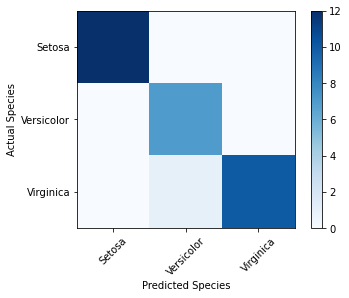

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(iris_classes))
plt.xticks(tick_marks, iris_classes, rotation=45)
plt.yticks(tick_marks, iris_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

Kiểm tra giá trị của đường AUC.

In [51]:
# Get class probability scores
iris_prob = multi_model.predict_proba(X_test)

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,iris_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 1.0


Sau khi đã có được một mô hình học máy khá tốt, chúng ta sẽ lưu lại mô hình này với tên iris_model.pkl và sử dụng file pickle này cho production.

In [53]:
import joblib

# Save the model as a pickle file
filename = '/content/iris_model.pkl'
joblib.dump(multi_model, filename)


['/content/iris_model.pkl']

In [54]:
# Tải file pickle mà chúng ta đã lưu
multi_model = joblib.load(filename)

#Khởi tạo một array mới x_new với 4 đại lượng đặc trưng. Chúng ta muốn mô hình dự đoán liệu x_new sẽ thuộc loại hoa nào
x_new = np.array([[1,2,3,4]])
print ('New sample: {}'.format(x_new[0]))

#Mô hình dự đoán sẽ trả về một mảng, chúng ta chỉ lấy giá trị đầu tiên của mảng, sau đó map với list iris_classes để lấy chính xác tên loài hoa
iris_pred = multi_model.predict(x_new)[0]
print('Predicted class is', iris_classes[iris_pred])

New sample: [1 2 3 4]
Predicted class is Virginica


In [55]:
multi_model.predict(x_new)

array([2])

In [56]:
# This time our input is an array of two feature arrays
x_new = np.array([[1,2,3,4],
         [5.1,3.5,0.4,1.2]])
print ('New samples:\n{}'.format(x_new))

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + iris_classes[prediction] +')')

New samples:
[[1.  2.  3.  4. ]
 [5.1 3.5 0.4 1.2]]
2 (Virginica)
0 (Setosa)
